In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
import seaborn as sns
import scienceplots
plt.style.use(['science', 'nature'])

In [2]:
G = nx.read_gml("../Base_main_community_norm.gml")
G.nodes['0']

{'ui': 'D000001',
 'name': 'Calcimycin',
 'community_louvain': 3,
 'normalized_weighted_degree': 0.00013261292938172064}

In [3]:
G_commented = nx.read_gml("../Commented_main_community_norm.gml")

In [4]:
# 将节点按照模块化类别分组，并计算每个类别的normalized_weighted_degree值
modularity_classes = nx.get_node_attributes(G, 'community_louvain')
normalized_weighted_degrees = nx.get_node_attributes(G, 'normalized_weighted_degree')
grouped_degrees = {mod_class: [] for mod_class in set(modularity_classes.values())}
for node, mod_class in modularity_classes.items():
    grouped_degrees[mod_class].append(normalized_weighted_degrees[node])
# grouped_degrees

In [5]:
modularity_classes2 = nx.get_node_attributes(G_commented, 'community_louvain')
normalized_weighted_degrees2 = nx.get_node_attributes(G_commented, 'normalized_weighted_degree')
grouped_degrees2 = {mod_class: [] for mod_class in set(modularity_classes2.values())}
for node, mod_class in modularity_classes2.items():
    grouped_degrees2[mod_class].append(normalized_weighted_degrees2[node])
# grouped_degrees2

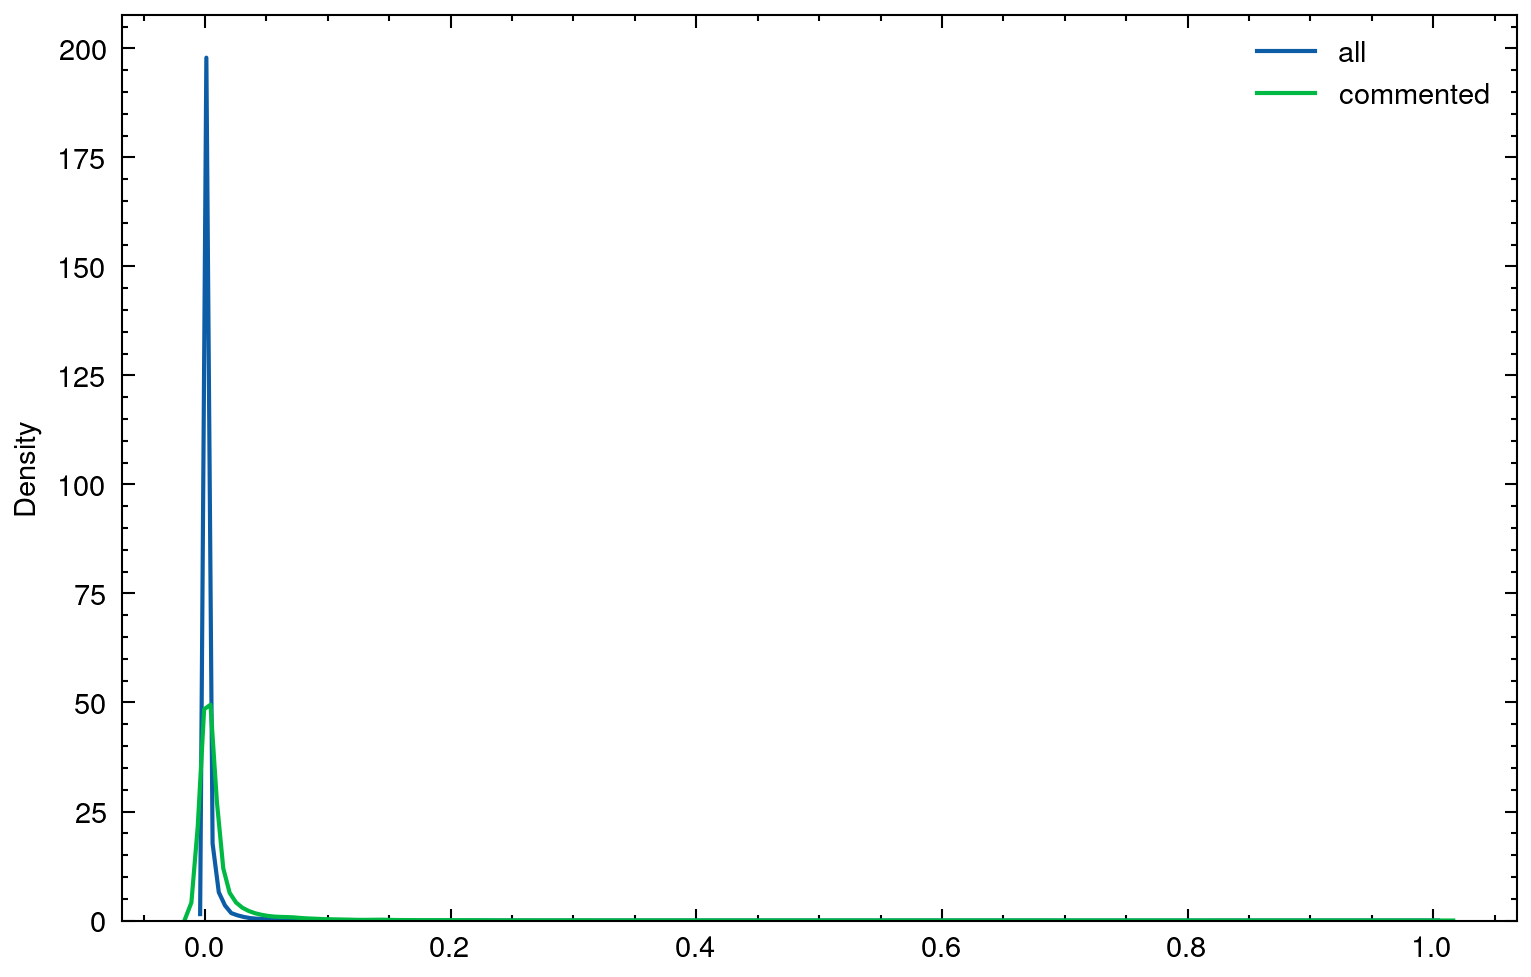

In [6]:
plt.figure(dpi=300)
sns.kdeplot(list(normalized_weighted_degrees.values()), label="all")
sns.kdeplot(list(normalized_weighted_degrees2.values()), label="commented")
# plt.xlim(0, 0.05)
plt.legend()
plt.show()

计算面积差

In [7]:
max(grouped_degrees[8])

0.13880532169370707

1	0.3273498134751988884955293822	0.1345802683563504253283649443	0.1927695451188484631671644379
2	0.1621749732110548378611989450	0.06269894231626068953879617381	0.09947603089479414832240277119
3	0.2778208643709925655080799625	0.9971391476882774947925167155	-0.7193182833172849292844367530
4	0.5686569160179652680492034163	0.1041657264858535895018123788	0.4644911895321116785473910375
5	0.4841347907140434280070171405	0.1442834986574519698644345074	0.3398512920565914581425826331
6	0.8165649298742824541323307705	0.05648500998423057787921774908	0.7600799198900518762531130214
7	0.5024398543562522816784179220	0.1248458789335361104236938615	0.3775939754227161712547240605
8	0.9730718071045808842730801094	0.1332695816801892600643185459	0.8398022254243916242087615635
9	0.4484013389888689824429891580	0.3094175178067865709076043594	0.1389838211820824115353847986


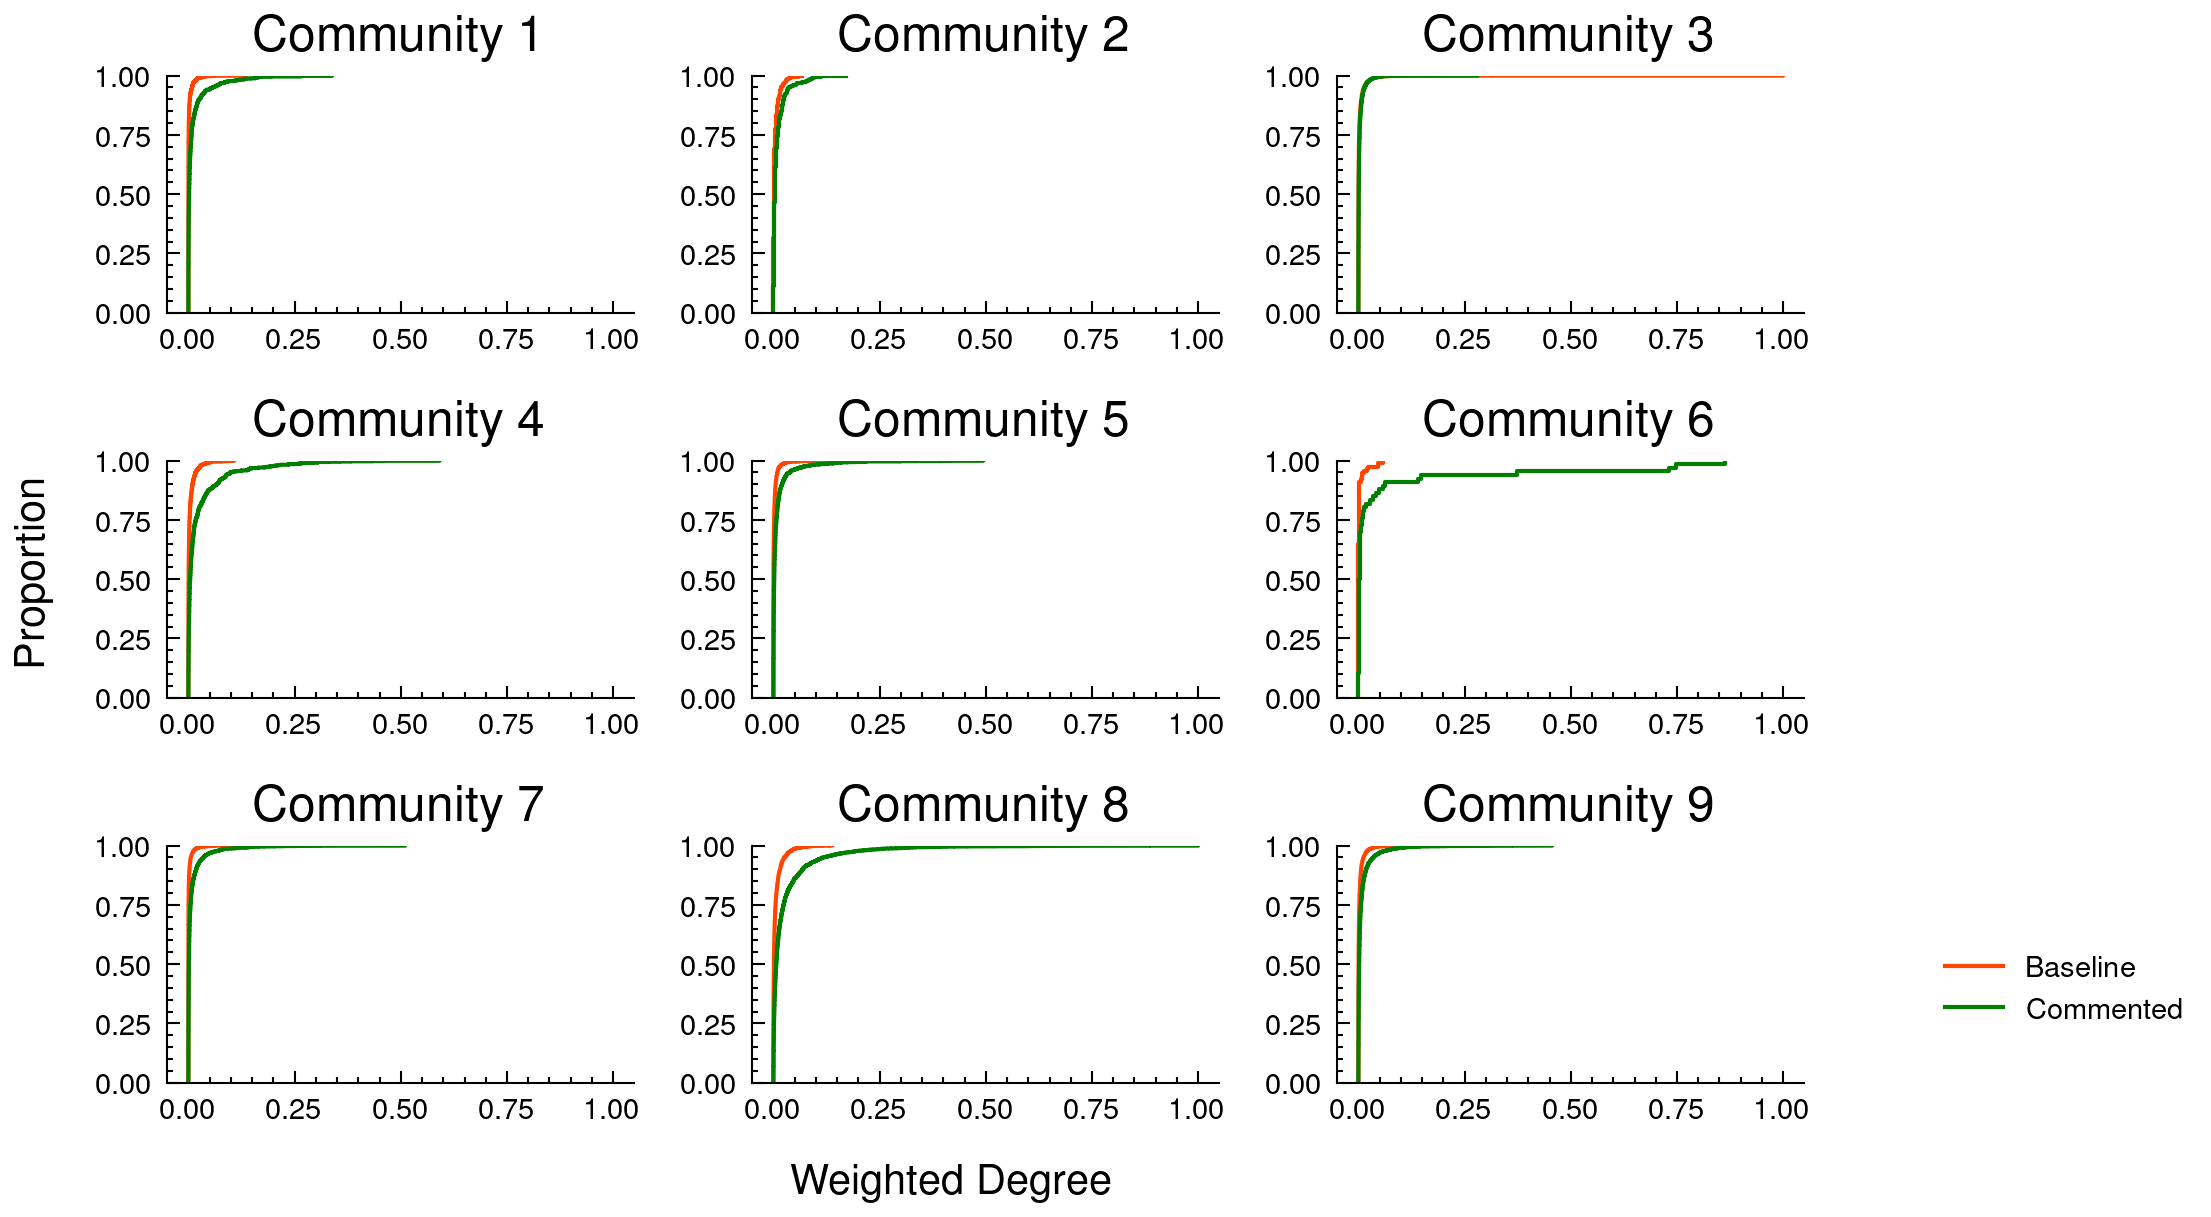

In [9]:
from decimal import Decimal
from scipy import integrate
def calculate_delta_area(all_line, commented_line):
    all_x, all_y = all_line.get_data()
    commented_x, commented_y = commented_line.get_data()
    area1 = calculate_area(commented_x, commented_y)
    area2 = calculate_area(all_x, all_y)
    print(area1, area2, area1-area2,sep="\t")
    return Decimal(area1-area2)

def calculate_area(x_array, y_array):
    res = Decimal(0)
    for idx, x in enumerate(x_array):
        if idx == 0:
            continue
        height = Decimal(x - x_array[idx-1])
        if height == np.inf:
            continue
        edge1 = Decimal(y_array[idx-1])
        edge2 = Decimal(y_array[idx])
        # if (edge1+edge2)*height/2 > 0.01:
        #     print(f"x:{x}, x-1:{x_array[idx-1]}, height: {height}, y1:{edge1}, y2: {edge2}, area:{(edge1+edge2)*height/2}")
        
        res += (edge1+edge2)*height/2
    return res

# def calculate_delta_area(all_line, commented_line):
#     all_x, all_y = all_line.get_data()
#     commented_x, commented_y = commented_line.get_data()
    
#     all_x = [np.float128(a) for a in all_x if a != np.inf]
#     all_y = [np.float128(a) for a in all_y if a != np.inf]
#     commented_x = [np.float128(a) for a in commented_x if a != np.inf]
#     commented_y = [np.float128(a) for a in commented_y if a != np.inf]
#     integrate1 = integrate.trapz(all_y, all_x)
#     integrate2 = integrate.trapz(commented_y, commented_x)
#     return integrate2-integrate1


fig, axes=plt.subplots(3,3, sharex=True, dpi=300)
fig.set_dpi(300)
area_lst = []
for i in range(1, 10):
    row, col = (i-1)//3, (i-1)%3
    ax = axes[row][col]
    sns.ecdfplot(grouped_degrees[i], label='all', ax=ax, color="orangered")
    sns.ecdfplot(grouped_degrees2[i], label='commented', ax=ax, color="green")
    # ax.set_xlim(0,0.05)
    # ax.set_ylim(0.5,1)  # 统一y
    ax.set_ylabel("")
    ax.set_title(f"Community {i}")
    all_line, commented_line = ax.get_lines()
    print(i, end='\t')
    delta = calculate_delta_area(all_line, commented_line)
    area_lst.append((i, delta))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
fig.set_tight_layout(True)
# fig.delaxes(axes[4][1])
fig.legend(["Baseline", "Commented"], bbox_to_anchor=(1.2, 0.2))
fig.text(-0.02, 0.5, 'Proportion', va='center', rotation='vertical', fontsize=10)
fig.text(0.5, -0.02, 'Weighted Degree', ha='center')
plt.show()

In [24]:
draw_seq = sorted(area_lst, key=lambda x:x[1], reverse=True)
draw_seq

[(6, Decimal('0.03695811028070005446279365765')),
 (8, Decimal('0.02125643911156348448896980530')),
 (4, Decimal('0.01879168726701708480387181409')),
 (1, Decimal('0.009033463839886034263981289994')),
 (5, Decimal('0.007411872000539195646514499266')),
 (7, Decimal('0.006504087270472257801394060891')),
 (2, Decimal('0.005206622380836018474900796116')),
 (9, Decimal('0.005087639162627049855229892910')),
 (3, Decimal('0.000431093014267161852731557889'))]

In [34]:
new_draw_seq = sorted(area_lst, key=lambda x:x[1], reverse=True)
new_draw_seq

[(8, Decimal('0.8398022254243916242087615635')),
 (6, Decimal('0.7600799198900518762531130214')),
 (4, Decimal('0.4644911895321116785473910375')),
 (7, Decimal('0.3775939754227161712547240605')),
 (5, Decimal('0.3398512920565914581425826331')),
 (1, Decimal('0.1927695451188484631671644379')),
 (9, Decimal('0.1389838211820824115353847986')),
 (2, Decimal('0.09947603089479414832240277119')),
 (3, Decimal('-0.7193182833172849292844367530'))]

In [35]:
seq = [(8, '0.84'),
 (6, '0.76'),
 (4, '0.46'),
 (7, '0.38'),
 (5, '0.34'),
 (1, '0.19'),
 (9, '0.14'),
 (2, '0.10'),
 (3, '-0.72')]
# area under curve

In [12]:
seq = [(6, '43.2'),
 (8, '21.4'),
 (4, '19.0'),
 (1, '9.2'),
 (5, '7.5'),
 (7, '6.6'),
 (2, '5.4'),
 (9, '5.1'),
 (3, '0.4')]

In [11]:
# 统计检验
for i in range(1, 10):
    statistic, p_value = stats.kstest(grouped_degrees[i], grouped_degrees2[i], )
    print(i, p_value)

1 1.0736791819752162e-94
2 3.7147687691898046e-11
3 4.317887930457653e-84
4 1.8530704607218033e-57
5 1.8009346351794407e-121
6 1.1637189519934813e-12
7 4.783e-321
8 5.338398943003416e-156
9 7.298082491638823e-149


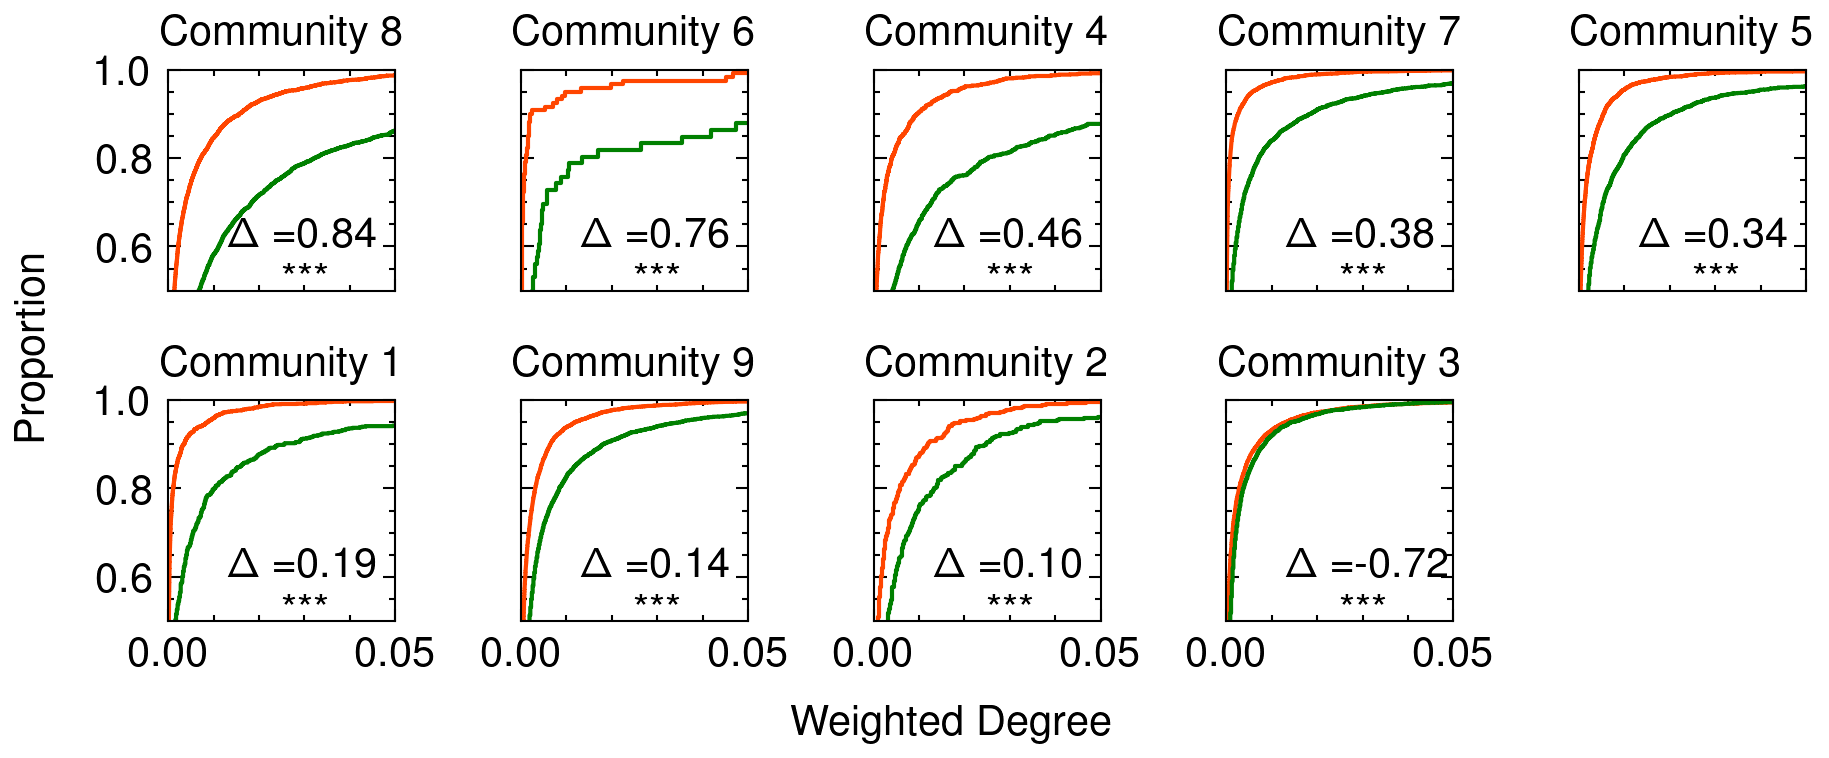

In [36]:
fig, axes=plt.subplots(2,5, sharex=True, sharey=True, dpi=300, figsize=(6,2.5))
fig.set_dpi(300)
for i in range(1, 10):
    row, col = (i-1)//5, (i-1)%5
    ax = axes[row][col]
    community = seq[i-1][0]
    sns.ecdfplot(grouped_degrees[community], label='Baseline', ax=ax, color="orangered")
    sns.ecdfplot(grouped_degrees2[community], label='Commented', ax=ax, color="green")
    
    ax.set_xlim(0,0.05)
    ax.set_ylim(0.5,1)  # 统一y
    ax.set_ylabel("")
    ax.set_title(f"Community {community}", fontsize=10)
    ax.set_yticks([0.6, 0.8, 1.0])
    # ax.set_xticks([0, 0.02, 0.04])
    
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.text(x=0.013, y=0.6, s=f"$\Delta = $" + seq[i-1][1] , fontsize=10)  #+ "$\\times 10^{-3}$
    ax.text(x=0.025, y=0.5, s="***" , fontsize=10)  #+ "$\\times 10^{-3}$
    
     
fig.set_tight_layout(True)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.3, hspace=None)
fig.delaxes(axes[1][4])
# fig.legend(["Baseline", "Commented"], bbox_to_anchor=(1.2, 0.2), fontsize=12)
fig.text(-0.02, 0.5, 'Proportion', va='center', rotation='vertical', fontsize=10)
fig.text(0.5, -0.02, 'Weighted Degree', ha='center')

plt.show()

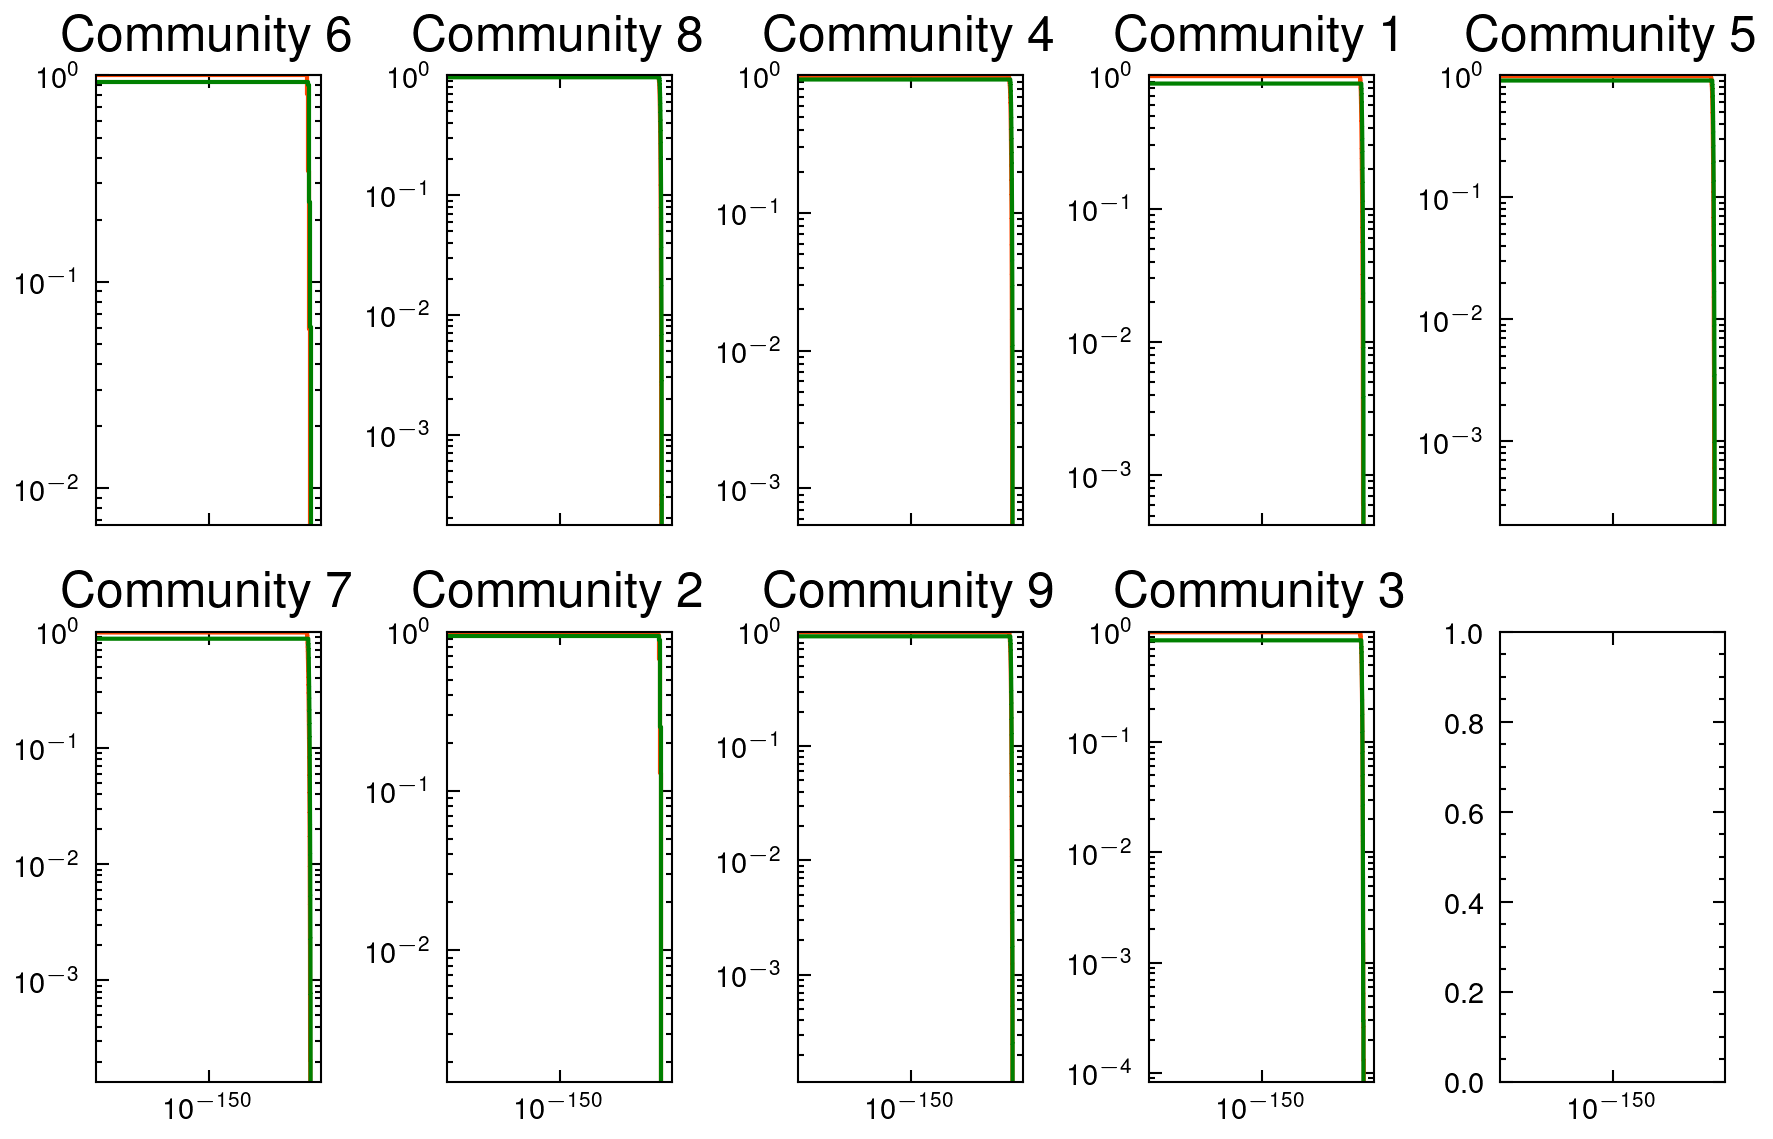

In [25]:
fig, axes=plt.subplots(2,5, sharex=True, dpi=300)
# ,  figsize=(2.6,3.5)
fig.set_dpi(300)
for i in range(1, 10):
    row, col = (i-1)//5, (i-1)%5
    ax = axes[row][col]
    community = seq[i-1][0]
    sns.ecdfplot(np.array(grouped_degrees[community])+1, label='all', ax=ax, complementary=True, log_scale=(True, True), color="orangered")
    sns.ecdfplot(np.array(grouped_degrees2[community])+1, label='commented', ax=ax, complementary=True, log_scale=(True, True), color="green")
    # ax.set_xlim(0.001, 1)
    # ax.set_ylim(0,1)  # 统一y
    ax.set_ylabel("")
    ax.set_title(f"Community {community}")
fig.set_tight_layout(True)
# fig.delaxes(axes[4][1])
# fig.legend(["all", "commented"], bbox_to_anchor=(1.3, 0.2))
plt.show()

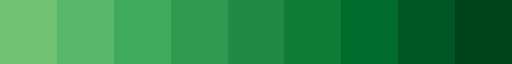

In [8]:
import matplotlib.colors
greens = matplotlib.colormaps['Greens']
greens = greens(np.linspace(0.5, 1, 9))
matplotlib.colors.ListedColormap(greens)

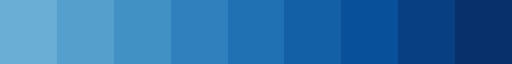

In [9]:
blues = matplotlib.colormaps['Blues']
blues = blues(np.linspace(0.5, 1, 9))
matplotlib.colors.ListedColormap(blues)

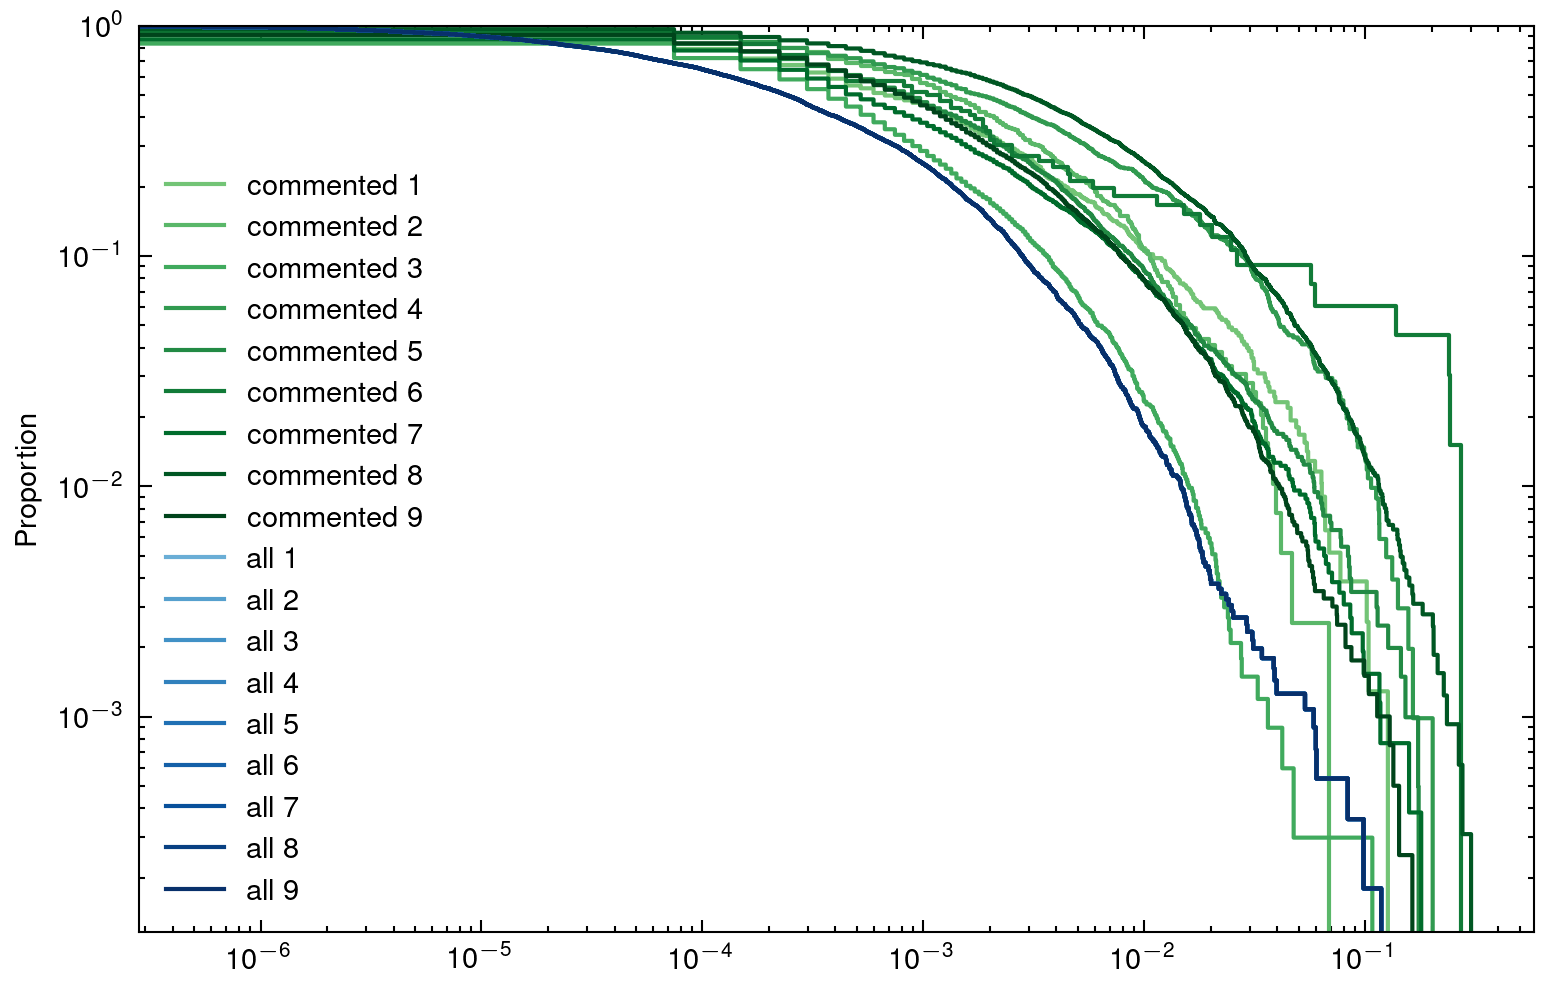

In [13]:
plt.figure(dpi=300)
for i in range(1, 10):
    sns.ecdfplot(np.array(grouped_degrees2[i])+1, label=f'commented {i}', complementary=True, log_scale=(True, True), color=greens[i-1])
for j in range(1, 10):
    sns.ecdfplot(np.array(grouped_degrees[i])+1, label=f'all {j}', complementary=True, log_scale=(True, True), color=blues[j-1])

# plt.xlim("")
plt.legend()
plt.show()